# Airplane Cargo Analysist


<img src="https://indianonlineseller.com/images/blogs/editor/amazon-transportation-services-helping-hand-or-grabbing-hand.jpg" alt="Flowers in Chania" style="border-radius: 15px 15px 15px 15px;"/>



# Set-UP


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
# # pull data from kaggle datasets
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download ikhsanmhmd/air-traffic-cargo-statistic
# ! unzip /content/air-traffic-cargo-statistic.zip
# ! rm /content/air-traffic-cargo-statistic.zip

# Data Wrangling


## Import


In [6]:
#import necessary library
import pandas as pd
pd.plotting.register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nbformat as nb
import random

#set all things that needed
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows',200)
pd.reset_option('display.max_rows')
# plt.style.use('dark_background')
plt.style.use('default')
# Set Style and Figure
sns.set(style='whitegrid')

# with kaggle
# df = pd.read_csv('/kaggle/input/air-traffic-cargo-statistic/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# with colab
# df = pd.read_csv('/content/drive/MyDrive/Ori Data Import/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# local
df = pd.read_csv('D:/.project/p01-air-cargo_analytics/Air_Traffic_Cargo_Statistics_20241015.csv', parse_dates=[1,13,14], date_format='mixed')
# API endpoint
# df = pd.read_csv('https://data.sfgov.org/resource/u397-j8nr.json', parse_dates=[1,13,14], date_format='mixed') # but just limited to 1000 row

In [7]:
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55542 entries, 0 to 55541
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              55542 non-null  int64         
 1   Activity Period Start Date   55542 non-null  datetime64[ns]
 2   Operating Airline            55542 non-null  object        
 3   Operating Airline IATA Code  54964 non-null  object        
 4   Published Airline            55542 non-null  object        
 5   Published Airline IATA Code  54964 non-null  object        
 6   GEO Summary                  55542 non-null  object        
 7   GEO Region                   55542 non-null  object        
 8   Activity Type Code           55542 non-null  object        
 9   Cargo Type Code              55542 non-null  object        
 10  Cargo Aircraft Type          55542 non-null  object        
 11  Cargo Weight LBS             55542 non-nu

In [8]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2024-09-20 13:00:39,2024-10-07 13:21:22
1,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2024-09-20 13:00:39,2024-10-07 13:21:22
2,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2024-09-20 13:00:39,2024-10-07 13:21:22
3,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2024-09-20 13:00:39,2024-10-07 13:21:22
4,199907,1999-07-01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2024-09-20 13:00:39,2024-10-07 13:21:22


In [9]:
#select all columns that we need
selected_df = df[[
#     'Activity Period',
    'Activity Period Start Date',
    'Operating Airline',
#     'Operating Airline IATA Code',
    'Published Airline',
#     'Published Airline IATA Code',
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Cargo Type Code',
    'Cargo Aircraft Type',
    'Cargo Weight LBS',
    # 'Cargo Metric TONS',
#     'data_as_of',
#     'data_loaded_at'
]].copy()

selected_df

,Activity Period Start Date,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55537,2024-07-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,26684
55538,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,355958
55539,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,275455
55540,2024-07-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,917995


In [10]:
#change all columns name
selected_df = selected_df.rename(columns={
    'Activity Period Start Date' : 'period',
    'Operating Airline' : 'operating_airline',
    'Published Airline' : 'published_airline',
    'GEO Summary' : 'geo_summary',
    'GEO Region' : 'geo_region',
    'Activity Type Code' : 'activity_type',
    'Cargo Type Code' : 'cargo_type',
    'Cargo Aircraft Type' : 'aircraft_type',
    'Cargo Weight LBS' : 'pound'
}) # type: ignore

selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,pound
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55537,2024-07-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,26684
55538,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,355958
55539,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,275455
55540,2024-07-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,917995


In [11]:
#Always run this cell one time, cant do it twice
selected_df['period'] = selected_df['period'].dt.to_period('M')
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,pound
0,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55537,2024-07,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,26684
55538,2024-07,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,355958
55539,2024-07,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,275455
55540,2024-07,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,917995


In [12]:
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air, LLC             34
ABX Air                350
ASTAR USA, LLC          16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        724
WOW Air                 55
World Airways           36
ZIPAIR Tokyo Inc        23
Name: count, Length: 133, dtype: int64

In [13]:
#see all airline names contain (,)
selected_df['operating_airline'].loc[selected_df['operating_airline'].str.contains(',')].value_counts().index

Index(['All Nippon Company Airways, Ltd.', 'TACA International Airlines, S.A.',
       'Aer Lingus, Ltd.', 'Atlas Air, Inc', 'COPA Airlines, Inc.',
       'Air Transport International, Inc.', 'Atlas Air, Inc. (inactive)',
       'China Eastern Airlines, Inc', 'Emery Worldwide Airlines, Inc.',
       '21 Air, LLC', 'ASTAR USA, LLC', 'Air Transport International, LLC.',
       'Total Airport Services, Inc. (Inactive)', 'Air Premia, Inc.',
       'Norse Atlantic UK, Ltd.', 'Envoy Air, Inc.'],
      dtype='object', name='operating_airline')

In [14]:
#remove extension from airlines name
def airline_name_cleaner(selected_df):
    selected_df = selected_df.replace(r'\bInc\b|\bLLC\b|\bLimited\b|\bLtd\b|\binactive\b|\bPre 07/01/2013\b|\bbecame Delta\b|\bLTD\b|\bGmbH\b|\bEHF\b|\bASA\b|\bCO\b|\bJSC\b|\bSPA\b|\bSA\b', '',regex=True).copy()
    selected_df = selected_df.replace(r'\([^)]*\)|[-,.]', '', regex=True)
    selected_df['operating_airline'] = selected_df['operating_airline'].apply(lambda x: x.strip() if isinstance(x, str) else x)
    selected_df['published_airline'] = selected_df['published_airline'].apply(lambda x: x.strip() if isinstance(x, str) else x)
    return selected_df

selected_df = airline_name_cleaner(selected_df)
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air                  34
ABX Air                350
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        724
WOW Air                 55
World Airways           36
ZIPAIR Tokyo            23
Name: count, Length: 129, dtype: int64

In [15]:
selected_df['operating_airline'].value_counts().sort_values(ascending=False)

operating_airline
United Airlines        9554
Alaska Airlines        2397
Korean Air Lines       2210
Asiana Airlines        1733
China Airlines         1729
                       ... 
Active Aero Charter       2
EAGLE                     1
Expressnet Airlines       1
All Canada Express        1
Arrow Air                 1
Name: count, Length: 129, dtype: int64

In [16]:
selected_df.describe()

,pound
count,5.554200e+04
mean,5.219387e+05
std,1.029179e+06
min,1.000000e+00
25%,1.923125e+04
50%,1.446150e+05
75%,5.919190e+05
max,2.381234e+07


In [17]:
selected_df.describe(include='object')

,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type
count,55542,55542,55542,55542,55542,55542,55542
unique,129,117,2,9,2,3,3
top,United Airlines,United Airlines,International,Asia,Deplaned,Cargo,Passenger
freq,9554,9575,38861,19474,28363,31045,45741


In [18]:
# Convert Period to timestamp
selected_df['period'] = selected_df['period'].dt.to_timestamp()

# Create New Feature
selected_df['year'] = selected_df.period.dt.year
selected_df['month'] = selected_df.period.dt.month
selected_df['quarter'] = selected_df.period.dt.to_period('Q')
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,pound,year,month,quarter
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048,1999,7,1999Q3
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003,1999,7,1999Q3
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450,1999,7,1999Q3
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776,1999,7,1999Q3
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086,1999,7,1999Q3
...,...,...,...,...,...,...,...,...,...,...,...,...
55537,2024-07-01,Vietnam Airlines,Vietnam Airlines,International,Asia,Enplaned,Cargo,Passenger,26684,2024,7,2024Q3
55538,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,355958,2024,7,2024Q3
55539,2024-07-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,275455,2024,7,2024Q3
55540,2024-07-01,ZIPAIR Tokyo,ZIPAIR Tokyo,International,Asia,Deplaned,Cargo,Passenger,917995,2024,7,2024Q3


# Exploratory Data Analysis (EDA)

## Distribution Plot Barchart

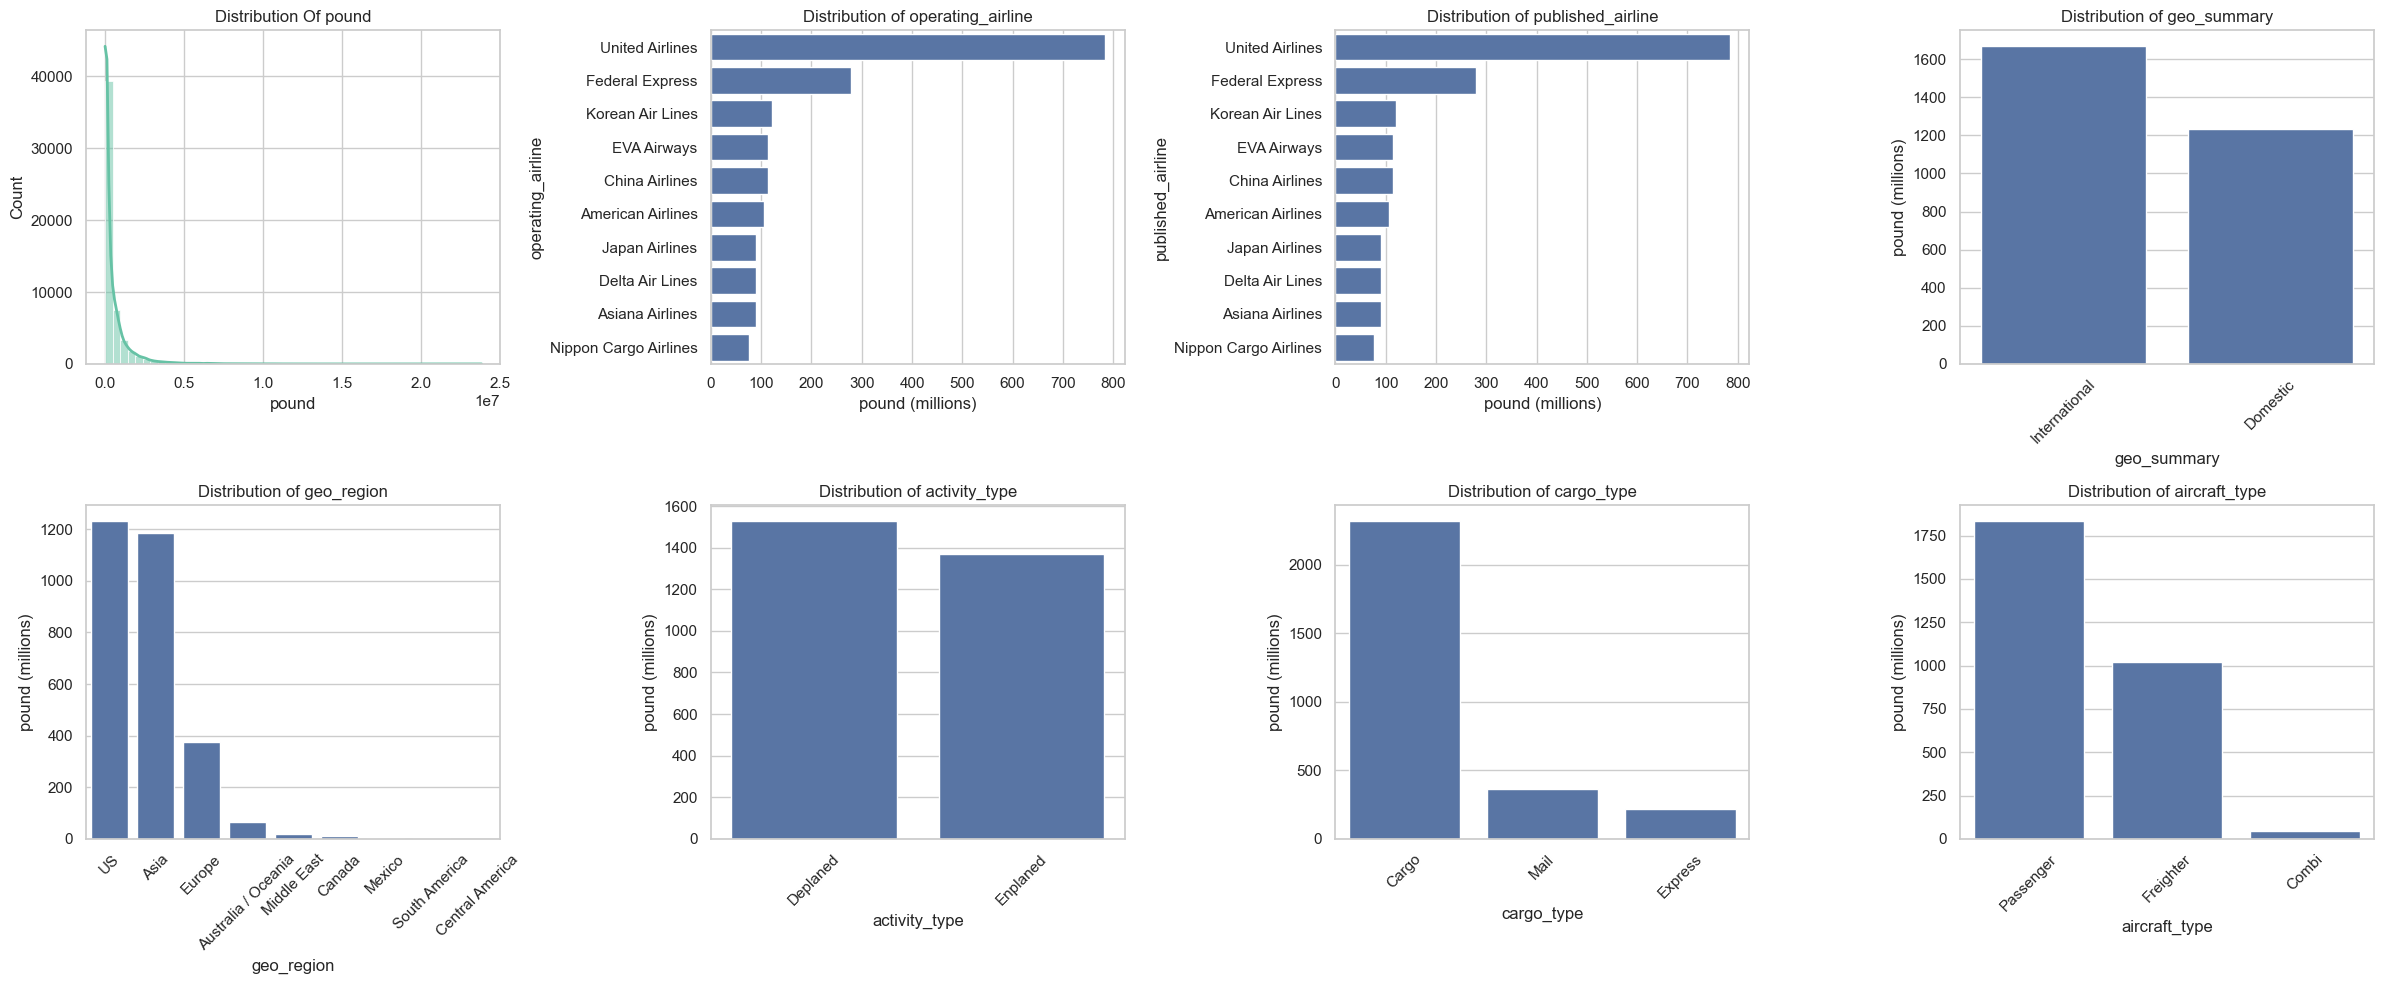

In [19]:
def feature_distributions(data, target='pound', n_cols=4):
    features = [col for col in data.columns if col != 'period' and col != target and col != 'year' and col != 'month' and col != 'quarter']
    
    n_rows = int(np.ceil(len(features)+1)/n_cols)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6,n_rows*5))
    ax = ax.flatten()

    # Plot Price Distribution
    sns.histplot(data=data, x=target, kde=True, bins=50, ax=ax[0], color='#66c2a5', line_kws={'color': '#8da0cb', 'linewidth': 2})
    ax[0].set_title(f'Distribution Of {target}')
    ax[0].set_xlabel(target)

    # Plot Feature Distribution
    for idx, col in enumerate(features, start=1):
        # Plot build for categorical values
        if data[col].nunique()>10:
            value_pound = data.groupby(col)['pound'].sum().sort_values(ascending=False)[:10]/10e6
            # sns.barplot(x=value_pound.values, y=value_pound.index, ax=ax[idx], color='#fc8d62')
            sns.barplot(x=value_pound.values, y=value_pound.index, ax=ax[idx])
            ax[idx].set_title(f'Distribution of {col}')
            ax[idx].set_xlabel(col)
            ax[idx].set_xlabel('pound (millions)')
        else:
            value_pound = data.groupby(col)['pound'].sum().sort_values(ascending=False)/10e6
            # sns.barplot(x=value_pound.index, y=value_pound.values, ax=ax[idx], color='#fc8d62')
            sns.barplot(x=value_pound.index, y=value_pound.values, ax=ax[idx])
            ax[idx].set_title(f'Distribution of {col}')
            ax[idx].set_xlabel(col)
            ax[idx].set_ylabel(target+' (millions)')
            ax[idx].tick_params(axis='x', rotation=45)

    # Remove ax that we don't use
    for i in range(len(features)+1,len(ax)):
        print(i)
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

feature_distributions(selected_df)

Terdapat 1 plot histogram dan 7 bar plot yang memperlihatkan distribusi data per masing masing categorical feature. _Pounds_ digunakan sebagai target dikarenakan dataset yang digunakan, melakukan rekapan data per-bulan. Selain itu dianjurkan melakukan analisa _seasonal period-over-period basis_, yang berarti membandingkan data per-tahun di periode yang sama (exp: januari 2023 vs januari 2024).

**Key Point:**
- Variable pounds terdistibusi positive (skewed right), namun ada beberapa nilai yang cukup tinggi yang mengindikasikan outlier. 
- Selanjutnya pada horizontal barplot bisa dilihat 10 airlines mendominasi san-francisco aircargo dengan total cargo terbesar dipegang oleh _United Airlines_ dan mengikuti _Federal Express_ diurutan ke-2 serta 8 airlines lainnya dengan total cargo yang hampir sama. 
- Antara operating and published airlines terlihat total cargo yang hampir sama untuk masing-masing airlines. Namun sebenarnya terdapat sedikit perbedaan total cargo untuk masing-masing airlines berdasarkan tugas mereka sebagai operating atau published airlines.
- Plot distribusi _geo_summary_ memperlihatkan total air-cargo international lebih besar dari total air-cargo domesctic sebesar &plusmn;200 millions pounds. Namun dalam plot region total cargo US (Domestic) mengungguli 8 region lainnya dimana asia dan eropa diurutan 2 dan 3.
- Untuk activity type terjadi perbedaan tipis antara cargo bongkar (enplaned) dan cargo muat (deplaned) dimana total cargo muat berada sedikit diatas total cargo bongkar. Hal ini juga akan memperlihatkan pergerakan jumlah Export dan Import san-francisco melalui air-cargo jika di sandingkan dengan feature _geo_summary_.
- Dua plot terakhir memperlihatkan Dominasi tipe cargo dan tipe pesawat oleh Cargo dan Passenger dimana masing-masing dikuti oleh 2 value berikutnya.

**Actionable Insight:**
- Investigasi outliers diperlukan untuk mengantisipasi adanya anomali dalam data yang mungkin akan mempengaruhi analysa dan pemodelan.
- Analisa sistem afiliasi antara published airlines dan operating airlines untuk mendapatkan insight yang lebih variatif.
- Kombinasikan feature geo_summary dengan feature lain seperti activity type, cargo type dan aircraft type. Untuk mencari insight yang bisa diterapkan di strategi pemasaran dan lainnya.
- Gunakan agregat lain seperti avarage untuk melihat distribusi data.

## Boxplot

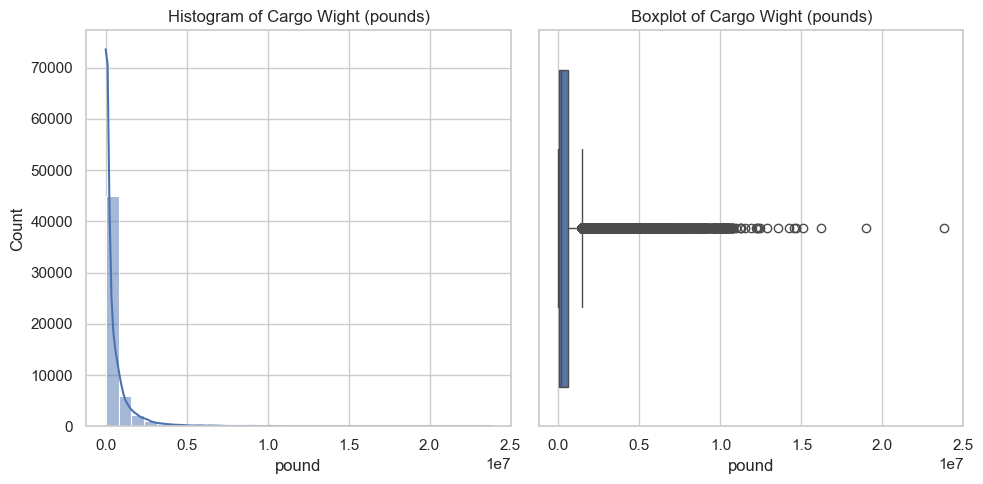

In [20]:
# Set Style and Figure
sns.set(style='whitegrid')

# Figure
plt.figure(figsize=(10,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(selected_df.pound, bins=30, kde=True)
plt.title('Histogram of Cargo Wight (pounds)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=selected_df.pound)
plt.title('Boxplot of Cargo Wight (pounds)')
plt.tight_layout()
plt.show()

Dari histogram diatas terlihat bahwa ada indikasi adanya outliers dan lebih jelas terlihat pada boxplot jika ada data point yang bernilai jauh dari whisker. Untuk lebih jelas mari pisahkan outlier dari kumpulan data, dengan menggunakan IQR.

In [21]:
Q1 = selected_df.pound.quantile(0.25)
Q3 = selected_df.pound.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = selected_df[(selected_df.pound < lower_bound) | (selected_df.pound > upper_bound)]
clean = selected_df[~((selected_df.pound < lower_bound) | (selected_df.pound > upper_bound))]

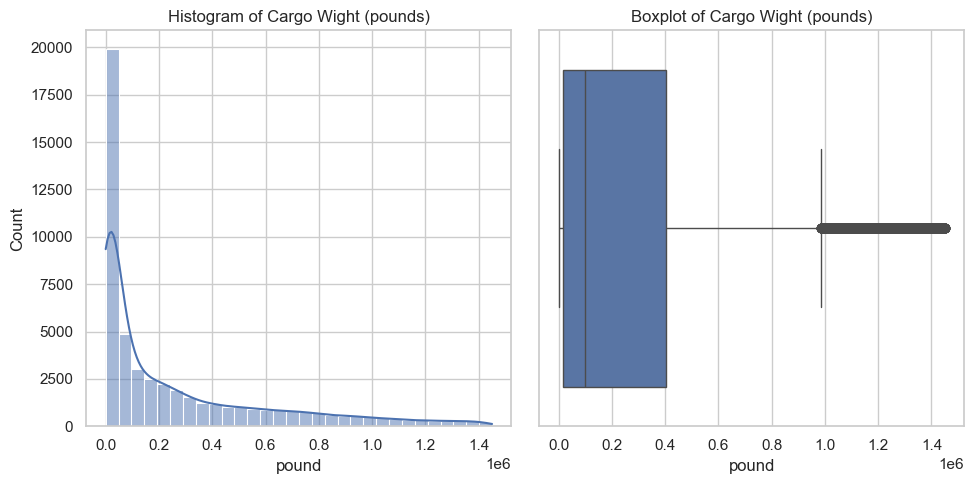

In [22]:
# Figure
plt.figure(figsize=(10,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(clean.pound, bins=30, kde=True)
plt.title('Histogram of Cargo Wight (pounds)')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=clean.pound)
plt.title('Boxplot of Cargo Wight (pounds)')
plt.tight_layout()
plt.show()

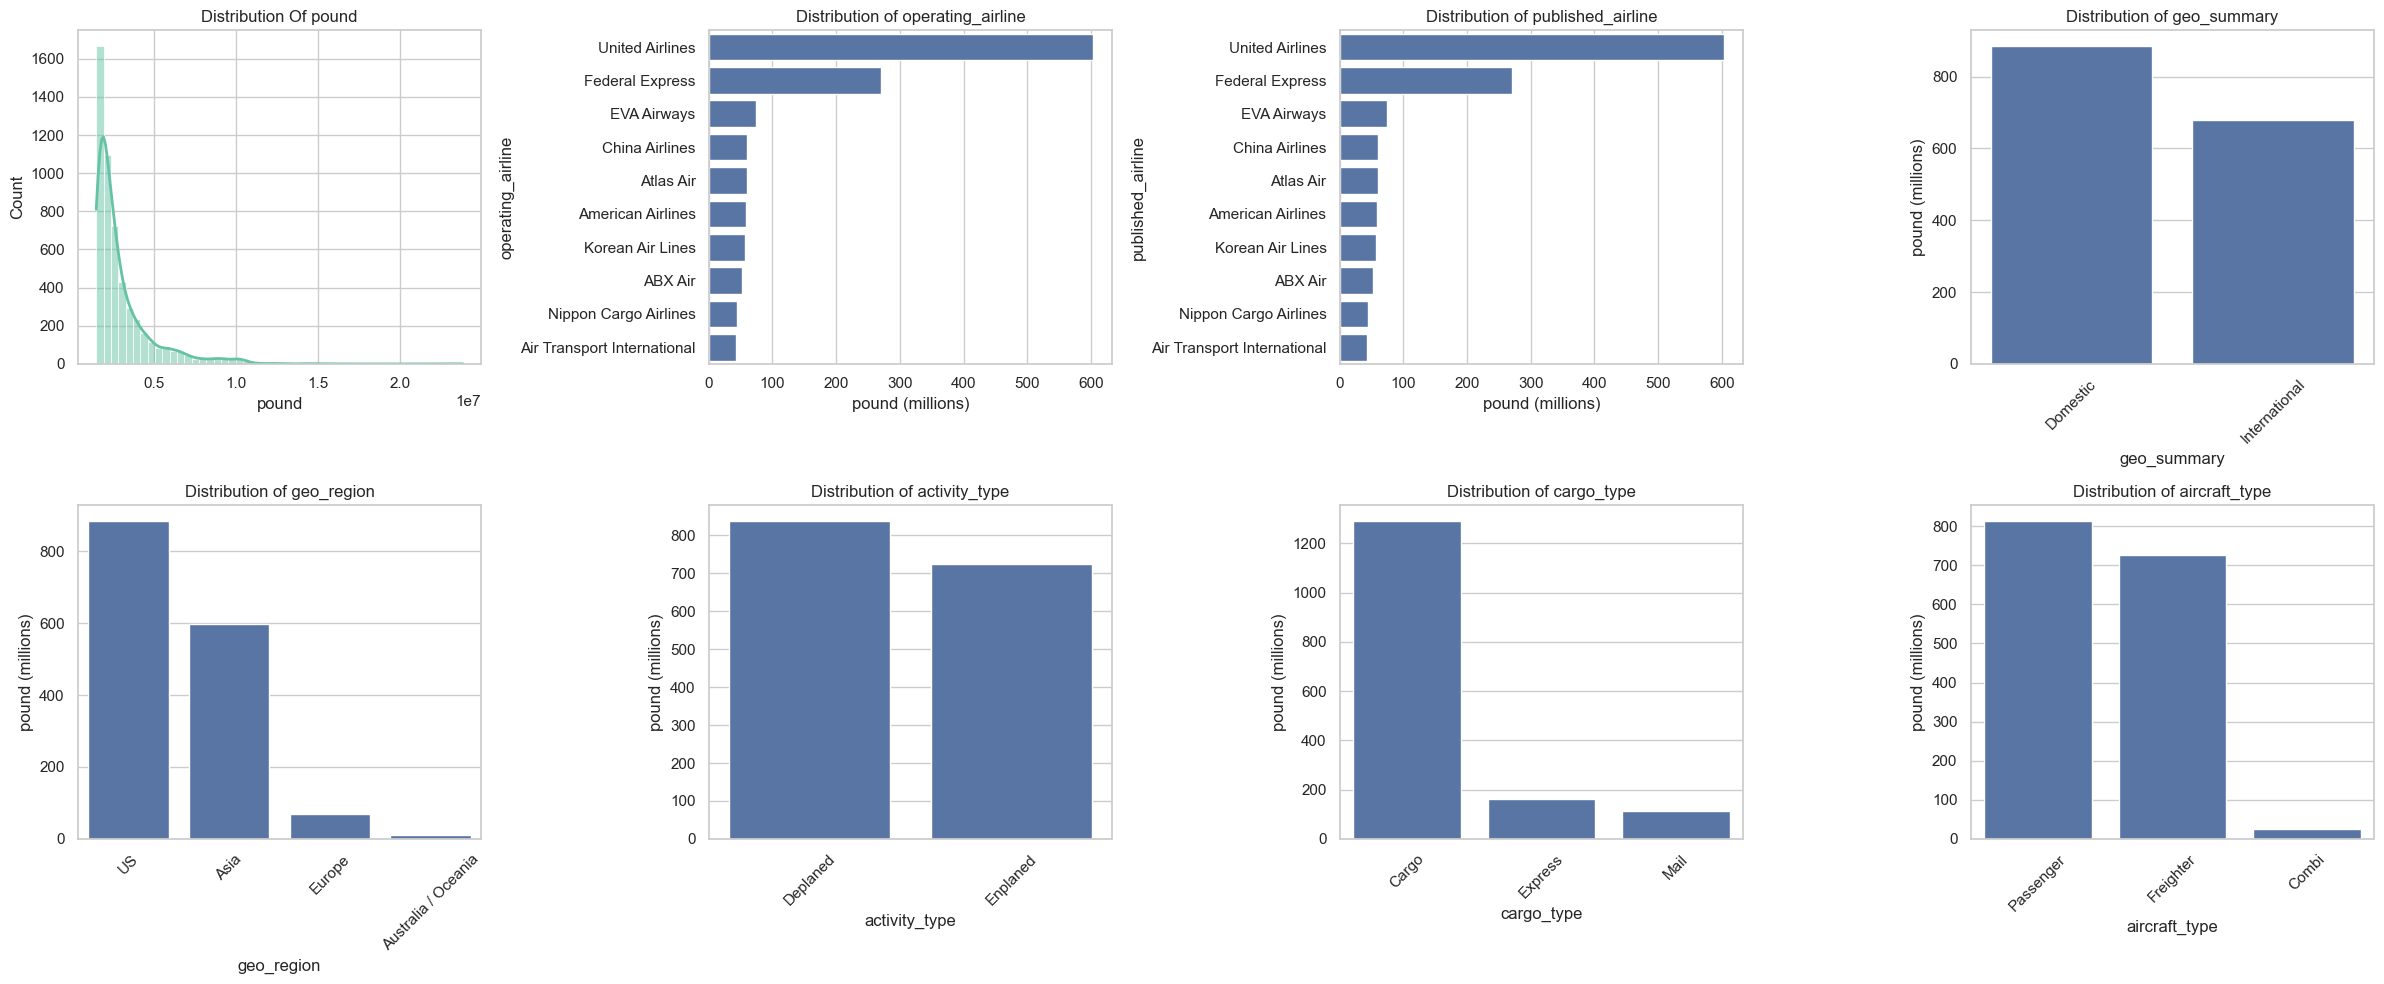

In [23]:
feature_distributions(outliers)

Text(0.5, 1.0, 'Distribution over the months')

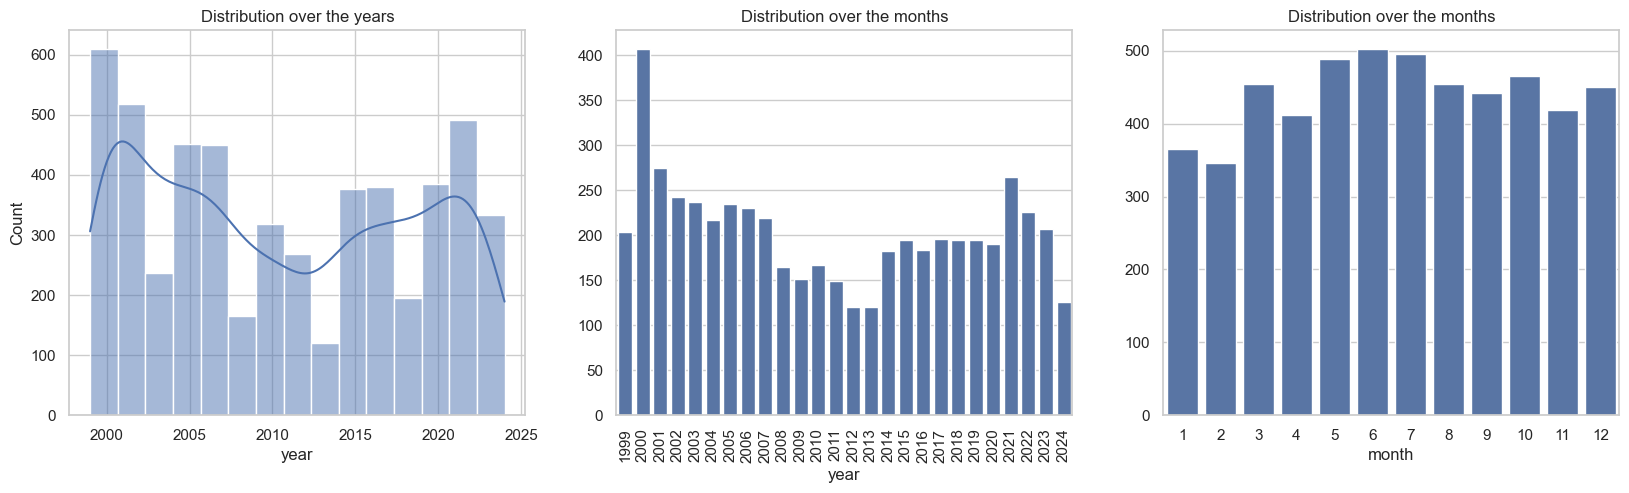

In [24]:
# Figure
plt.figure(figsize=(20,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(outliers.year, kde=True)
plt.title('Distribution over the years')

plt.subplot(1,3,2)
year_count = outliers.year.value_counts().sort_index()
sns.barplot(x=year_count.index, y=year_count.values)
plt.tick_params(axis='x', rotation=90)
plt.title('Distribution over the months')

plt.subplot(1,3,3)
month_count = outliers.month.value_counts().sort_index()
sns.barplot(x=month_count.index, y=month_count.values)
plt.title('Distribution over the months')

Dikarenakan distribusi outliers merata di semua kategori dan timeline, serta tidak ditemukan kejanggalan atau data bias didalam outliers. Maka untuk EDA kita gunakan data asli sebelum outliers dipisahkan. Namun untuk pemodelan akan kita lakukan A/B testing untuk melihat perbedaan dan pengaruh yang diberikan outliers terhadap peforma model.

## Airplane Afiliation

In [25]:
afiliate = selected_df[selected_df.operating_airline != selected_df.published_airline]
print(afiliate.operating_airline.value_counts())
print(afiliate.published_airline.value_counts())

operating_airline
Horizon Air                    688
SkyWest Airlines               655
Compass Airlines               151
Mesa Airlines                   20
American Eagle Airlines         20
Comair                          20
Trans States Airlines           18
ASTAR USA                       16
Mesaba Airlines                  5
Atlantic Southeast Airlines      4
Envoy Air                        3
Air Canada Jazz                  2
Name: count, dtype: int64
published_airline
Alaska Airlines      1058
Delta Air Lines       243
American Airlines     224
US Airways             38
United Airlines        21
DHL Express            16
Air Canada              2
Name: count, dtype: int64


In [26]:
afiliate2 = afiliate.groupby(['published_airline', 'operating_airline']).size().reset_index(name='count').sort_values(ascending=False, by='count')
afiliate2

,published_airline,operating_airline,count
1,Alaska Airlines,Horizon Air,688
2,Alaska Airlines,SkyWest Airlines,370
11,Delta Air Lines,SkyWest Airlines,214
4,American Airlines,Compass Airlines,151
6,American Airlines,SkyWest Airlines,50
14,United Airlines,SkyWest Airlines,21
3,American Airlines,American Eagle Airlines,20
9,Delta Air Lines,Comair,20
12,US Airways,Mesa Airlines,20
13,US Airways,Trans States Airlines,18


In [27]:
all_afiliate_airline = list(pd.concat([afiliate2['published_airline'],afiliate2['operating_airline']]).unique())

airline_index = {airline: i for i, airline in enumerate(all_afiliate_airline)}

afiliate2['source'] = afiliate2['published_airline'].map(airline_index)
afiliate2['target'] = afiliate2['operating_airline'].map(airline_index)

def generate_color():
    return f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.7)'

afiliate2['color'] = [generate_color() for _ in range(len(afiliate2))]


afiliate2['hover_color'] = afiliate2['color'].apply(lambda x: x.replace('0.7', '1'))

fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=10,
        line=dict(color='grey', width=0.5),
        label=all_afiliate_airline,
        color = 'grey'
    ),
    link=dict(
        source=afiliate2['source'],
        target=afiliate2['target'],
        value=afiliate2['count'],
        color=afiliate2['color']
    )
))

fig.update_layout(title_text="Sankey Diagram for Airlines Afilation", font_size=12, width=1000, height=700)
fig.show()


## Geospatial Flow Analysis: Export vs. Import Trends


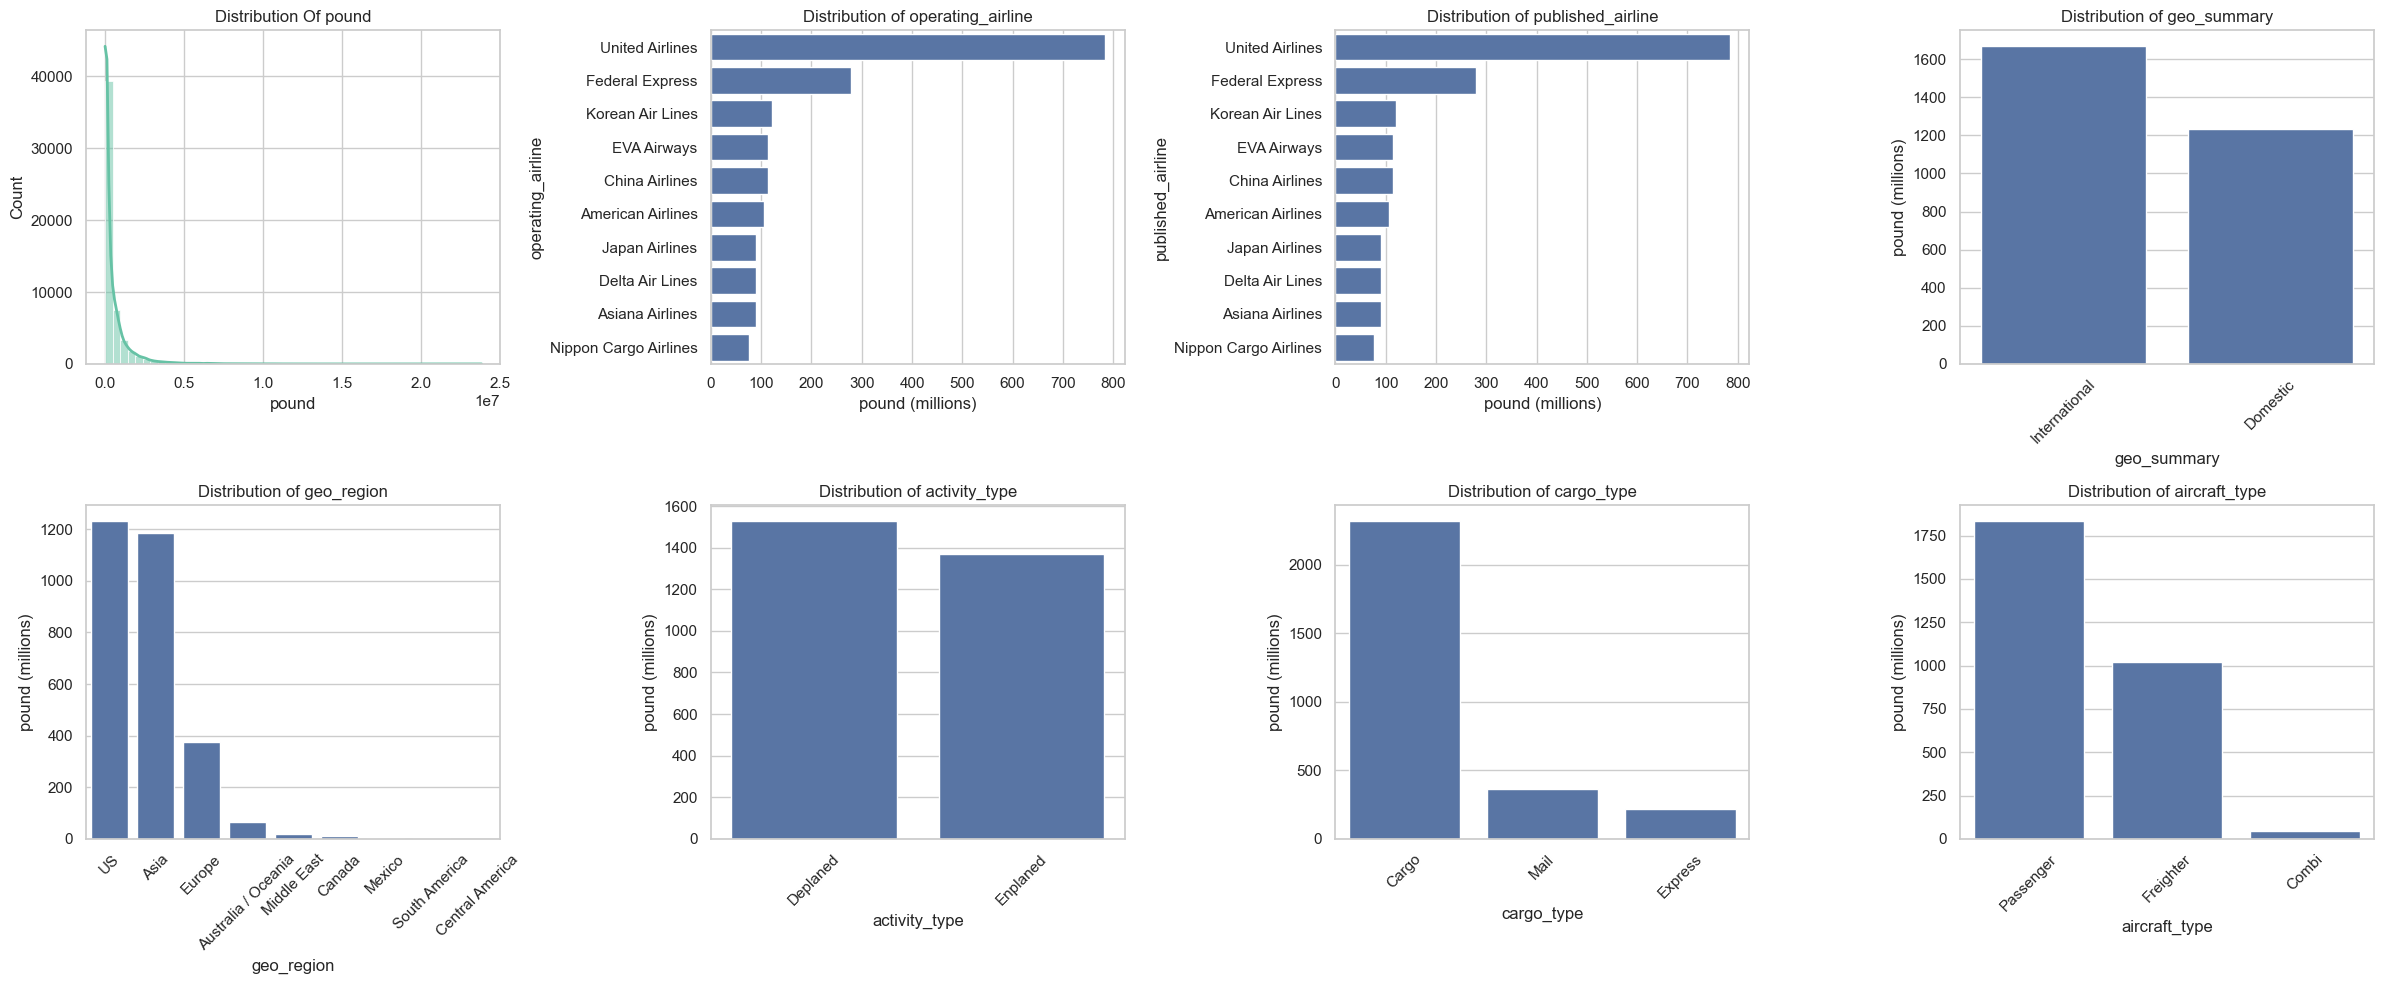

In [29]:
feature_distributions(selected_df)


<Axes: xlabel='activity_type'>

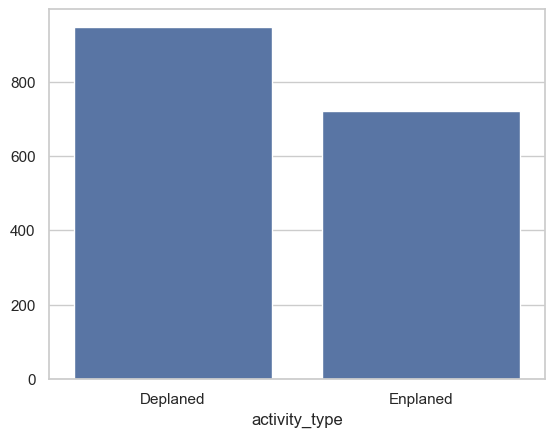

In [30]:
international = selected_df[selected_df.geo_summary == 'International']
com1 = international.groupby('activity_type')['pound'].sum()/10e6

sns.barplot(x=com1.index, y=com1.values)